# Loading data

In [34]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
# import PIL.Image as Image
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [36]:
train_batch = ImageDataGenerator().flow_from_directory(train_path,
                                                       target_size=(224,224),
                                                       classes=['dog','cat'],
                                                       batch_size=10)
valid_batch = ImageDataGenerator().flow_from_directory(valid_path,
                                                       target_size=(224,224),
                                                       classes=['dog','cat'],
                                                       batch_size=4)
test_batch = ImageDataGenerator().flow_from_directory(test_path,
                                                       target_size=(224,224),
                                                       classes=['dog','cat'],
                                                       batch_size=10)


Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [37]:
# the cat is [0,1] so 1 is in the first index. the dog is [1,0] so 1 is in the 0th index.
train_batch.class_indices

{'dog': 0, 'cat': 1}

In [38]:
# plots images with labels 
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [39]:
imgs, labels = next(train_batch)

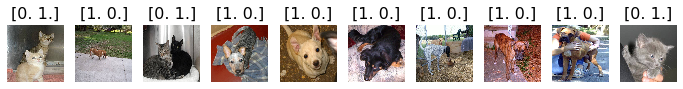

In [40]:
plots(imgs, titles=labels)

# Build CNN

In [41]:
model = Sequential([
    Conv2D(filters=2, kernel_size=(3,3), activation='relu', 
           input_shape=(224,224,3), padding='same'),
    Conv2D(filters=3, kernel_size=(3,3), activation='relu', 
           padding='same'),
    Flatten(),
    Dense(2,activation='softmax'),
])
model.get_weights()

Instructions for updating:
Colocations handled automatically by placer.


[array([[[[ 0.3108049 ,  0.21459574],
          [-0.05346051, -0.00938469],
          [-0.29295757,  0.06527802]],
 
         [[ 0.12389106, -0.34189662],
          [ 0.06182122, -0.25739178],
          [ 0.26961815,  0.34522426]],
 
         [[-0.001252  ,  0.3483647 ],
          [-0.19031286, -0.32096782],
          [ 0.10589406, -0.08725917]]],
 
 
        [[[ 0.291439  ,  0.17907107],
          [ 0.1682626 , -0.14009206],
          [ 0.2909128 , -0.29711217]],
 
         [[-0.02770165,  0.15967417],
          [-0.17526416, -0.13197999],
          [-0.35632834, -0.06775221]],
 
         [[ 0.3402769 , -0.14947128],
          [-0.34157172,  0.10995951],
          [-0.26433536,  0.22925878]]],
 
 
        [[[ 0.27684426,  0.10189   ],
          [-0.26124752, -0.22623655],
          [-0.04554743, -0.27932164]],
 
         [[-0.03329253,  0.3388763 ],
          [-0.21251121,  0.33040583],
          [ 0.22498238, -0.33713043]],
 
         [[-0.18027967, -0.19297877],
          [ 0.167485

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 2)       56        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 3)       57        
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 301058    
Total params: 301,171
Trainable params: 301,171
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
# steps_per_epoch is the dataset divided by the batch size which in the generator
model.fit_generator(train_batch, steps_per_epoch=4,
                    validation_data=valid_batch, validation_steps=4, 
                    epochs=5, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4/4 [==============================] - 1s 188ms/step - loss: 6.8794 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
4/4 [==============================] - 1s 126ms/step - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
4/4 [==============================] - 0s 120ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
4/4 [==============================] - 0s 117ms/step - loss: 7.6561 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
4/4 [==============================] - 0s 117ms/step - loss: 6.4472 - acc: 0.6000 - val_loss: 8.0590 - val_acc: 0.5000


# Predict

This CNN only has 4 layers. It is too simple to make a good classify. This model just show how to build the CNN by Keras.

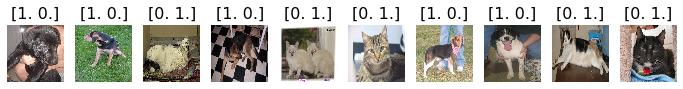

In [45]:
test_imgs, test_labels = next(test_batch)
plots(test_imgs,titles=test_labels)

In [46]:
test_label = test_labels[:,0]
test_label

array([1., 1., 0., 1., 0., 0., 1., 1., 0., 0.], dtype=float32)

In [47]:
predictions = model.predict_generator(test_batch,steps=1,verbose=0)

In [48]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [49]:
cm = confusion_matrix(test_label, predictions[:,0])

In [50]:

def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,newaxis]
        print('Normalized confusion matirx')
    else:
        print('Confusion matirx, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matirx, without normalization
[[5 0]
 [5 0]]


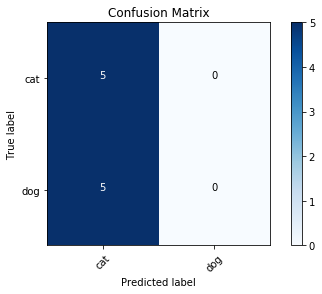

In [51]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')